<a href="https://colab.research.google.com/github/NaveenDivakar/Sentiment-Analysis/blob/main/flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00


In [ ]:
!pip install langchain openai beautifulsoup4


In [ ]:
!pip show langchain


Name: langchain
Version: 0.3.19
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
ERROR: Operation cancelled by user


In [ ]:
!pip install langchain[chat_models]


  Using cached langchain-0.3.20-py3-none-any.whl.metadata (7.7 kB)
Using cached langchain-0.3.20-py3-none-any.whl (1.0 MB)


In [ ]:
!pip install langchain-community


  Using cached langchain-0.3.20-py3-none-any.whl.metadata (7.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.4 MB/s eta 0:00:00
Using cached langchain-0.3.20-py3-none-any.whl (1.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade langchain


  Using cached langchain-0.3.20-py3-none-any.whl.metadata (7.7 kB)
Using cached langchain-0.3.20-py3-none-any.whl (1.0 MB)


In [ ]:
import langchain
import langchain_community

print("LangChain version:", langchain.__version__)
print("LangChain Community installed.")


LangChain version: 0.3.20
LangChain Community installed.


In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate


In [ ]:
pip install -U langchain-openai


In [ ]:
pip install --upgrade openai langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.5/473.5 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.61.1
    Uninstalling openai-1.61.1:
      Successfully uninstalled openai-1.61.1


In [ ]:
!pip install openai langchain_openai beautifulsoup4 pandas


Yes, the code you provided relies on OpenAI's API to perform sentiment analysis, which requires an API key. However, you can modify the code to perform sentiment analysis without using the OpenAI API by utilizing open-source sentiment analysis libraries such as VADER (from NLTK) or TextBlob.



In [ ]:
#preprocessing
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download necessary NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data

# Load the CSV file containing reviews
file_path = r'combined_flipkart_phone_reviews.csv'
df = pd.read_csv(file_path)

# Check the structure of the DataFrame to find the review column
print(df.head())  # This will show the first few rows of the DataFrame

# Assuming the review column is named 'Review'
review_column = 'Review'  # Update this to the actual review column name

# Define a function to clean and preprocess reviews
def preprocess_reviews(reviews):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    processed_reviews = []

    for review in reviews:
        if isinstance(review, str):  # Ensure review is a string
            # Remove HTML tags using BeautifulSoup
            review = BeautifulSoup(review, "html.parser").get_text()

            # Remove occurrences of 'READ MORE' (case insensitive)
            review = re.sub(r'\bREAD MORE\b', '', review, flags=re.IGNORECASE)

            # Remove special characters, numbers, and extra spaces
            review = re.sub(r'[^a-zA-Z\s]', '', review)
            review = re.sub(r'\s+', ' ', review)  # Replace multiple spaces with a single space

            # Convert text to lowercase
            review = review.strip().lower()

            # Tokenize the review
            tokens = word_tokenize(review)

            # Remove stop words and lemmatize tokens
            cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

            # Join tokens back into a single string
            processed_review = ' '.join(cleaned_tokens)
            processed_reviews.append(processed_review)
        else:
            processed_reviews.append('')  # Handle non-string cases, if any

    return processed_reviews

# Define a sentiment analysis function using TextBlob
def analyze_sentiment(reviews):
    cleaned_reviews = preprocess_reviews(reviews)
    sentiments = []

    for review in cleaned_reviews:
        if review:  # Ensure the review is not empty
            # Perform sentiment analysis using TextBlob
            blob = TextBlob(review)
            sentiment_score = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

            # Determine sentiment label based on polarity score
            if sentiment_score > 0:
                sentiments.append('Positive')
            elif sentiment_score < 0:
                sentiments.append('Negative')
            else:
                sentiments.append('Neutral')
        else:
            sentiments.append('Neutral')  # Handle empty reviews as neutral

    return sentiments

# Example usage
if __name__ == "__main__":
    reviews = df[review_column].tolist()  # Extract the reviews from the DataFrame
    sentiment_results = analyze_sentiment(reviews)  # Perform sentiment analysis
    df['sentiment'] = sentiment_results  # Add the sentiment results to the DataFrame

    # Save the results to a new CSV file
    output_file_path = r'combined_flipkart_phone_reviews.csv'
    df.to_csv(output_file_path, index=False)

    # Display the first few rows of the DataFrame with sentiment
    print(df[['Phone Name', 'Rating', review_column, 'sentiment']].head())




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


         Product ID          Phone Name  Rating  \
0  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
1  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
2  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
3  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
4  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   

                                              Review  
0  Samsung Galaxy s series great features at attr...  
1  Camera and display quality is awesomeThere is ...  
2                              I like the product 🫶🏻  
3                                   Superb phone....  
4  Portrait mode is excellent.Night mode performa...  
           Phone Name  Rating  \
0  Samsung Galaxy S23       5   
1  Samsung Galaxy S23       5   
2  Samsung Galaxy S23       5   
3  Samsung Galaxy S23       5   
4  Samsung Galaxy S23       5   

                                              Review sentiment  
0  Samsung Galaxy s series great features at attr...  Positive  
1  Camera and display quality is a

In [ ]:

df.shape

(531, 5)

In [ ]:
df["sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
Positive,486
Neutral,31
Negative,14


The code is performing a comprehensive process to train a sentiment analysis model using reviews from a Flipkart dataset and then use the sentiment predictions to calculate product scores and generate recommendations

In [ ]:
#flipkart_review_sentiment_analysis_and_recommendation.
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
import random

# Load Dataset
df = pd.read_csv("combined_flipkart_phone_reviews.csv")

# Step 1: Map sentiment to numerical labels
sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
df['label'] = df['sentiment'].map(sentiment_mapping)

# Step 2: Train-Test Split (preserve the original DataFrame)
df_train_test = df[['Review', 'label']].copy()  # Keep original data in a separate DataFrame
train_texts, test_texts, train_labels, test_labels = train_test_split(df_train_test['Review'], df_train_test['label'], test_size=0.2, random_state=42)

# Step 3: Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Tokenize reviews
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

# Dataset class
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewsDataset(train_encodings, list(train_labels))
test_dataset = ReviewsDataset(test_encodings, list(test_labels))

# Step 4: Training Arguments and Trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

# Step 5: Predict Sentiment for all reviews while keeping original DataFrame
df_encodings = tokenizer(list(df['Review']), truncation=True, padding=True, return_tensors="pt")
predictions = trainer.predict(ReviewsDataset(df_encodings, df['label']))
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Map predicted labels to sentiment
df['predicted_sentiment'] = predicted_labels.tolist()
label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
df['predicted_sentiment'] = df['predicted_sentiment'].map(label_mapping)

# Save predicted sentiments while keeping all original columns
df.to_csv("flipkart_reviews_with_predicted_sentiments.csv", index=False)

# Step 6: Product Score Calculation without 'Phone Name' and 'Rating'
def calculate_product_score(df):
    # Map sentiment to a numerical score
    df['sentiment_score'] = df['predicted_sentiment'].map({'Positive': 3, 'Neutral': 2, 'Negative': 1})

    # Calculate review count for each review (assuming no 'Phone Name' grouping)
    df['review_count'] = df.groupby('Review')['Review'].transform('count')

    # Simplified product score based on sentiment and review count
    df['product_score'] = (df['sentiment_score'] * 0.7) + (df['review_count'] * 0.3)

    return df

df = calculate_product_score(df)

# Step 7: Unified Recommendation System
def recommend_products_based_on_score(df):
    recommendations = []
    for index, row in df.iterrows():
        # Use product_score or sentiment to recommend similar products
        other_reviews = df[df.index != index].copy()  # Compare with other reviews

        # Sort other reviews by product score
        other_reviews = other_reviews.sort_values(by='product_score', ascending=False)

        if not other_reviews.empty:
            top_reviews = other_reviews.head(3)
            recommendations.append(f"Consider products with similar reviews: {', '.join(top_reviews.index.astype(str))}.")
        else:
            recommendations.append("No recommendations available.")

    return recommendations

df['Recommendations'] = recommend_products_based_on_score(df)

# Step 8: Save final recommendations
output_file_path = 'flipkart_reviews_with_score_based_recommendations.csv'
df.to_csv(output_file_path, index=False)

# Print a sample of the DataFrame to verify the output
print(df.head(10))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-11dead026df0>:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: naveendivakar1968 (naveendivakar1968-vellore-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
10,0.617000,0.355065
20,0.298400,0.337485
30,0.184300,0.362167
40,0.355400,0.290101
50,0.303700,0.257441
60,0.130300,0.283463
70,0.241200,0.252882
80,0.193300,0.245538


<ipython-input-17-11dead026df0>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


         Product ID          Phone Name  Rating  \
0  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
1  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
2  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
3  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
4  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
5  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
6  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
7  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
8  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       4   
9  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   

                                              Review sentiment  label  \
0  Samsung Galaxy s series great features at attr...  Positive      2   
1  Camera and display quality is awesomeThere is ...   Neutral      1   
2                              I like the product 🫶🏻   Neutral      1   
3                                   Superb phone....  Positive      2   
4  Portrait mode is excellent.Night mode performa...  Positive      2   


In [ ]:
# Save the trained model and tokenizer
output_dir = "sentiment_model1"

# Save the model
model.save_pretrained(output_dir)

# Save the tokenizer
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to sentiment_model1


In [ ]:
import shutil

# Zip the model directory
shutil.make_archive("/content/sentiment_model1", 'zip', "/content/sentiment_model1")

print("Model directory zipped for download.")


Model directory zipped for download.


In [ ]:
from google.colab import files

# Download the zipped model
files.download("/content/sentiment_model1.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import numpy as np

# Load Dataset
# Assuming the file is actually named 'E__GUVI_FINAL PROJECT_combined_flipkart_phone_reviews.csv' or 'flipkart_reviews_with_predicted_sentiments.csv'
try:
    df = pd.read_csv("/content/combined_flipkart_phone_reviews.csv.csv")  # First try the original file name
except FileNotFoundError:
    try:
        df = pd.read_csv("flipkart_reviews_with_predicted_sentiments.csv")  # Try the file created in the previous cell
    except FileNotFoundError:
        print("Error: Neither 'E__GUVI_FINAL PROJECT_combined_flipkart_phone_reviews.csv' nor 'flipkart_reviews_with_predicted_sentiments.csv' were found.")
        # Handle the error (e.g., exit the script or prompt the user for the correct file path)


# Step 1: Map sentiment to numerical labels
sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
df['label'] = df['sentiment'].map(sentiment_mapping)

# Step 2: Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Review'], df['label'], test_size=0.2, random_state=42
)

# Step 3: Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Tokenize in Batches (for memory efficiency)
def batch_tokenize(texts, tokenizer, batch_size=32):
    encodings = {'input_ids': [], 'attention_mask': []}
    for i in range(0, len(texts), batch_size):
        batch_encodings = tokenizer(texts[i:i+batch_size], truncation=True, padding=True)
        encodings['input_ids'].extend(batch_encodings['input_ids'])
        encodings['attention_mask'].extend(batch_encodings['attention_mask'])
    return encodings

train_encodings = batch_tokenize(list(train_texts), tokenizer)
test_encodings = batch_tokenize(list(test_texts), tokenizer)

# Dataset class
class ReviewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewsDataset(train_encodings, list(train_labels))
test_dataset = ReviewsDataset(test_encodings, list(test_labels))

# Step 4: Training Arguments and Trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",  # Evaluate periodically
    logging_steps=10,
    save_steps=500,  # Save checkpoints periodically
    load_best_model_at_end=True  # Use the best checkpoint
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

# Step 5: Predict Sentiment for all reviews
df_encodings = batch_tokenize(list(df['Review']), tokenizer)
predictions = trainer.predict(ReviewsDataset(df_encodings, df['label']))
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Map predicted labels to sentiment
df['predicted_sentiment'] = predicted_labels.tolist()
label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
df['predicted_sentiment'] = df['predicted_sentiment'].map(label_mapping)

# Step 6: Product Score Calculation
def calculate_product_score(df):
    df['sentiment_score'] = df['predicted_sentiment'].map({'Positive': 3, 'Neutral': 2, 'Negative': 1})
    df['review_count'] = df.groupby('Review')['Review'].transform('count')
    df['product_score'] = (df['sentiment_score'] * 0.7) + (df['review_count'] * 0.3)
    return df

df = calculate_product_score(df)

# Step 7: Optimize Recommendation Calculation
def recommend_products_based_on_score(df):
    df_sorted = df.sort_values(by='product_score', ascending=False)
    top_reviews = df_sorted.head(3).index
    return [f"Consider products with similar reviews: {', '.join(map(str, top_reviews))}."] * len(df)

df['Recommendations'] = recommend_products_based_on_score(df)

# Step 8: Drop intermediate columns before saving
df.drop(columns=['sentiment_score', 'review_count'], inplace=True)

# Step 9: Save final recommendations
output_file_path = '/content/flipkart_reviews_with_score_based_recommendations1.csv'
df.to_csv(output_file_path, index=False)

# Print a sample of the DataFrame to verify the output
print(df.head())


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-21-faabbd644cf8>:74: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss
10,0.663400,0.358028
20,0.293200,0.356112
30,0.188700,0.353170
40,0.375700,0.312357
50,0.331100,0.275199
60,0.128100,0.302950
70,0.264300,0.270769
80,0.234900,0.260650


Could not locate the best model at ./results/checkpoint-80/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


         Product ID          Phone Name  Rating  \
0  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
1  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
2  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
3  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   
4  MOBGNPGZVX4PCTTF  Samsung Galaxy S23       5   

                                              Review sentiment  label  \
0  Samsung Galaxy s series great features at attr...  Positive      2   
1  Camera and display quality is awesomeThere is ...   Neutral      1   
2                              I like the product 🫶🏻   Neutral      1   
3                                   Superb phone....  Positive      2   
4  Portrait mode is excellent.Night mode performa...  Positive      2   

  predicted_sentiment  product_score  \
0            Positive            2.4   
1            Positive            2.4   
2            Positive            2.4   
3            Positive            2.4   
4            Positive            2.4   

             

In [ ]:
# Save the trained model and tokenizer
output_dir = "/content/sentiment_model2"

# Save the model
model.save_pretrained(output_dir)

# Save the tokenizer
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to /content/sentiment_model2


In [ ]:
import shutil

# Zip the model directory
shutil.make_archive("/content/sentiment_model2", 'zip', "/content/sentiment_model2")

print("Model directory zipped for download.")


Model directory zipped for download.


In [ ]:
from google.colab import files

# Download the zipped model
files.download("/content/sentiment_model2.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-25-e33904fea618>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


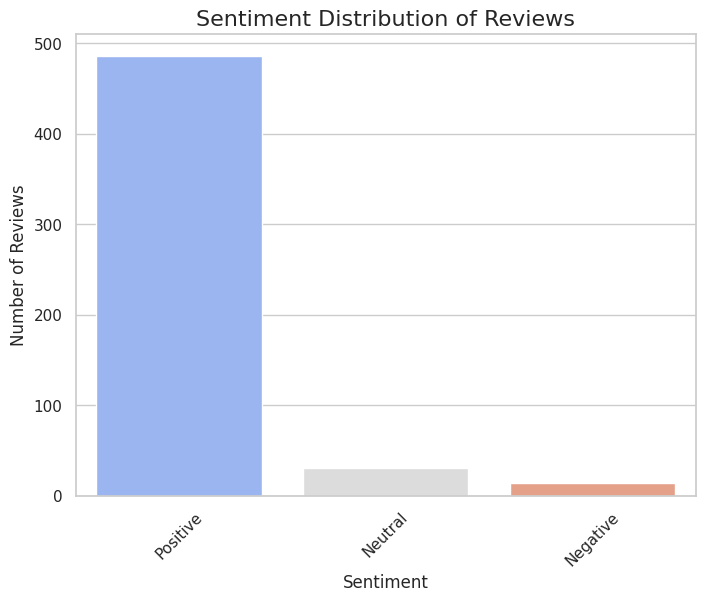

<ipython-input-25-e33904fea618>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendation_counts.index, y=recommendation_counts.values, palette='Set2')


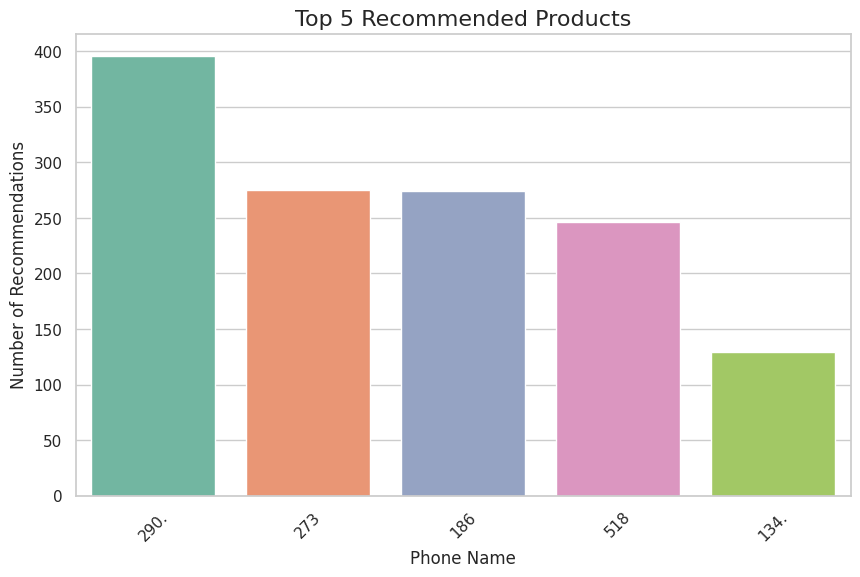

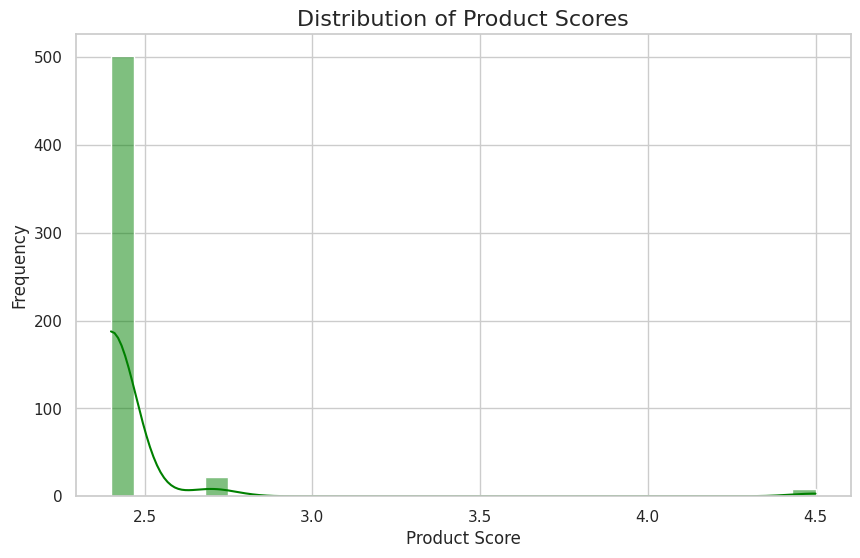

<ipython-input-25-e33904fea618>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='product_score', data=df, palette='coolwarm')


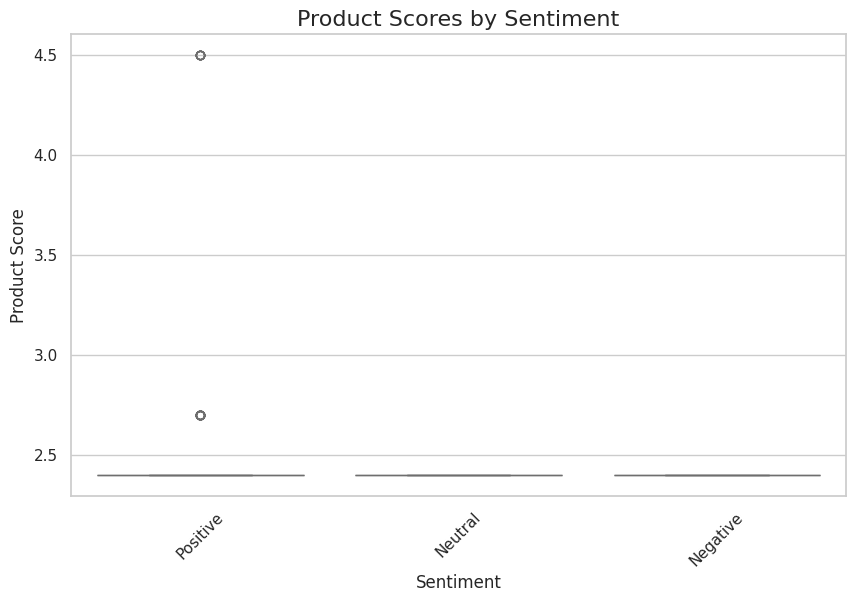

In [ ]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # for regular expression

# Load the CSV file containing reviews with recommendations
file_path = r'/content/flipkart_reviews_with_score_based_recommendations.csv'
df = pd.read_csv(file_path)

# Set plot style
sns.set(style="whitegrid")

# 1. Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Distribution of Reviews', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 2. Product Recommendation Frequency Plot
# Extract recommendations and count the most frequently recommended products
recommended_products = []
for recommendation in df['Recommendations'].dropna():  # Drop any missing values to avoid errors
    # Check for any product recommendations using regex for more flexibility
    match = re.search(r'Consider products with similar reviews: (.*)', recommendation)
    if match:
        # Extract phone names from the recommendations (split by comma)
        phones_in_recommendation = match.group(1).strip().split(',')
        recommended_products.extend([phone.strip() for phone in phones_in_recommendation])

# Convert to DataFrame for counting
recommended_df = pd.DataFrame(recommended_products, columns=['Phone Name'])

# Count the frequency of each recommended phone
recommendation_counts = recommended_df['Phone Name'].value_counts().head(5)  # Top 5 most recommended products

# Plot the top 5 recommended products
plt.figure(figsize=(10, 6))
sns.barplot(x=recommendation_counts.index, y=recommendation_counts.values, palette='Set2')
plt.title('Top 5 Recommended Products', fontsize=16)
plt.xlabel('Phone Name', fontsize=12)
plt.ylabel('Number of Recommendations', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 3. Distribution of Product Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['product_score'], kde=True, color='green', bins=30)
plt.title('Distribution of Product Scores', fontsize=16)
plt.xlabel('Product Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 4. Sentiment vs. Product Score Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='product_score', data=df, palette='coolwarm')
plt.title('Product Scores by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Product Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-26-f0ed6ae848e6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='Phone Name', data=df, palette='coolwarm')


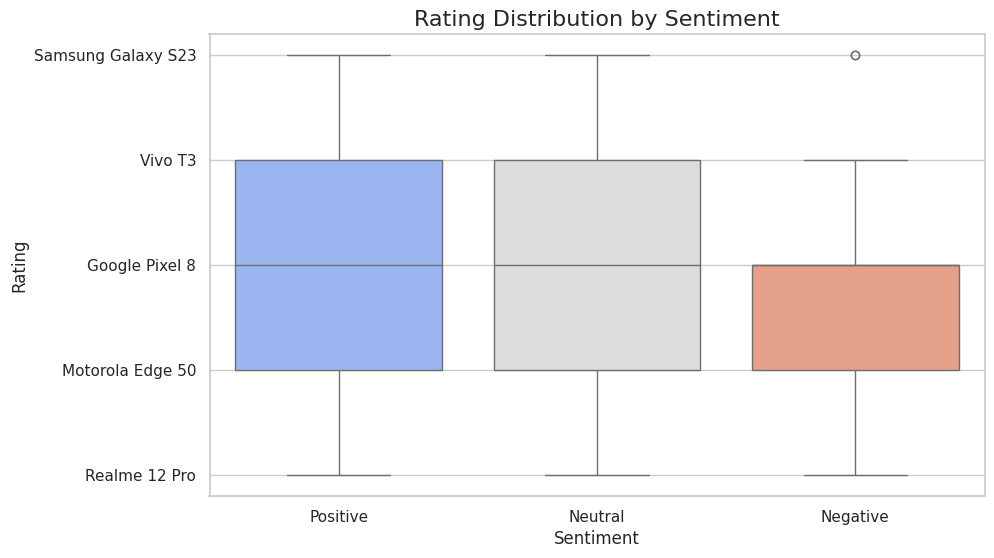

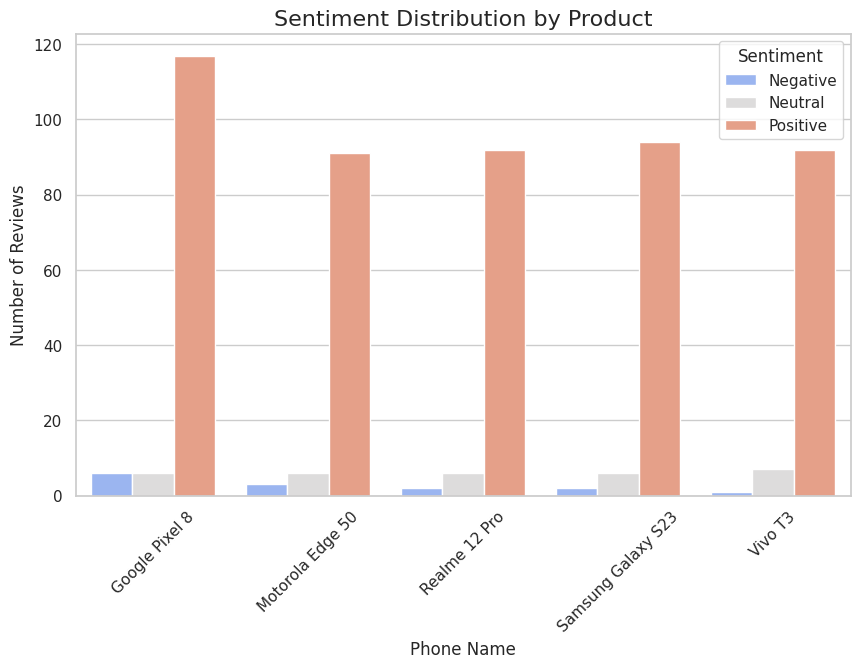

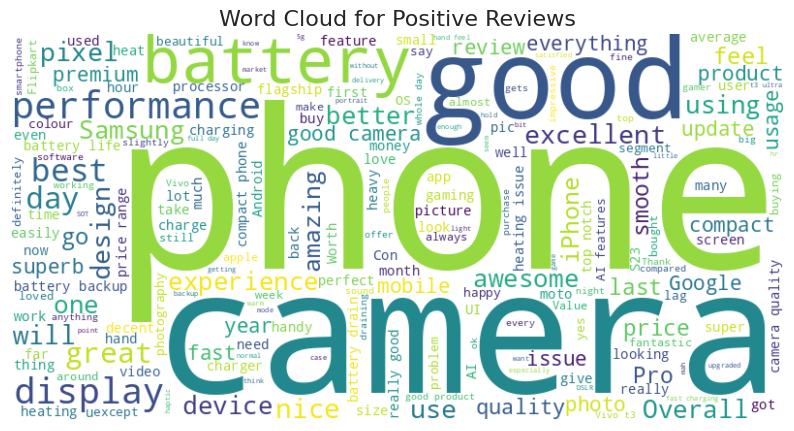

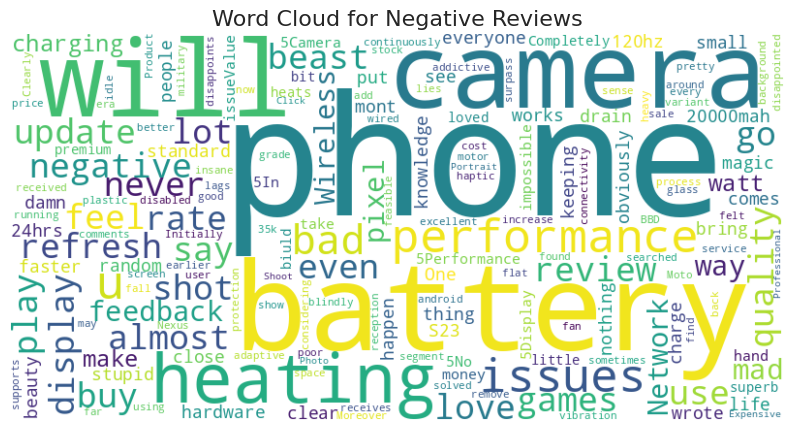

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Rating Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Phone Name', data=df, palette='coolwarm')
plt.title('Rating Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

# 2. Sentiment by Product (Grouped Bar Chart)
plt.figure(figsize=(10, 6))
sentiment_by_product = df.groupby(['Phone Name', 'sentiment']).size().reset_index(name='count')
sns.barplot(x='Phone Name', y='count', hue='sentiment', data=sentiment_by_product, palette='coolwarm')
plt.title('Sentiment Distribution by Product', fontsize=16)
plt.xlabel('Phone Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# 3. Word Cloud for Positive Reviews
from wordcloud import WordCloud

# Combine all positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['Review'].tolist())

# Generate the word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.axis('off')
plt.show()

# 4. Word Cloud for Negative Reviews (if you have negative sentiment data)
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']['Review'].tolist())

# Generate the word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.axis('off')
plt.show()
